# FDIC Loan Regulatory Reasoning Assistant

# Project Overview

This capstone project focuses on the domain of Banking and Financial Regulation, with a specific emphasis on Prompt Engineering and Context Engineering, rather than model training or fine-tuning. The objective is to design and implement a Regulatory Reasoning Assistant that interprets the FDIC RMS Manual of Examination Policies – Section 3.2 (Loans) to support regulatory-aligned loan analysis.

The assistant is designed to help users understand regulatory expectations, identify documentation gaps, and highlight areas requiring clarification under FDIC guidance. All responses are strictly grounded in the provided regulatory text, and the system explicitly avoids loan approval, rejection, or recommendation decisions.

# Problem Statement

**Create a Regulatory Reasoning Assistant that:**

 - Interprets FDIC RMS Manual – Section 3.2 (Loans)

 - Provides regulatory-aligned observations and considerations

 - Identifies documentation gaps and examiner expectations

 - Uses the regulatory document as the single source of truth

 - Does not approve, reject, or recommend loans


# Install Required Libraries

To run this project, the following Python libraries are required:

 - Gradio – for building the web-based user interface

 - PyPDF – for extracting text from the FDIC PDF

 - OpenAI-compatible SDK – for LLM access

 - Pillow & pytesseract – for OCR on uploaded loan application images

In [ ]:
!pip install gradio openai pypdf pytesseract pillow
!apt-get install -y tesseract-ocr


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 1 not upgraded.


# Import Required Libraries

The following libraries are imported to support document handling, OCR, UI rendering, and LLM interaction:

In [ ]:
from pypdf import PdfReader
import gradio as gr
import openai
from PIL import Image
import pytesseract
from google.colab import files

# Load FDIC Section 3.2 Text

The FDIC RMS Manual – Section 3.2 (Loans) is uploaded as a PDF and parsed using PdfReader.
The extracted text is stored in a variable and used as the primary regulatory context for all model responses.

In [ ]:
FDIC_SECTION_3_2 = """
FDIC RISK MANAGEMENT MANUAL OF EXAMINATION POLICIES - SECTION 3.2 (LOANS)
EXPANDED KNOWLEDGE BASE

1. INTRODUCTION AND SAFETY STANDARDS
Section 39 of the Federal Deposit Insurance Act (FDI Act) requires federal banking agencies to establish safety and soundness standards for insured depository institutions. These standards address asset quality, earnings, stock valuation, and internal controls. The "Interagency Guidelines Establishing Standards for Safety and Soundness" (Appendix A to Part 364) specifically dictate that institutions must identify, measure, monitor, and control credit risk.

The loan portfolio typically represents the largest asset class and the most significant source of risk to a bank’s capital. Consequently, the examiner’s evaluation of the loan portfolio—including lending policies, credit administration, and the quality of individual loans—is the most critical aspect of the examination process. This evaluation directly determines the "Asset Quality" component of the CAMELS rating.

2. LOAN ADMINISTRATION AND GOVERNANCE

Lending Policy Requirements
The board of directors is ultimately responsible for the institution's lending function. They must formulate, approve, and review (at least annually) a written lending policy. This policy acts as the governing document for all credit activities and must clearly address:
- The trade area and acceptable types of loans.
- Lending authority limits for specific officers and committees.
- Guidelines for unsecured loans and portfolio diversification.
- Interest rate policies and repayment terms.
- Limitations on Loan-to-Value (LTV) ratios.
- Guidelines for obtaining and reviewing real estate appraisals.
- Environmental risk management.

Loan Review Systems
Every institution must maintain an effective internal loan review system. The primary objective is to promptly identify loans with well-defined credit weaknesses so that timely action can be taken to minimize loss.
- Independence: To ensure objectivity, loan review personnel should be independent of the lending function.
- Scope: The system must validate the accuracy of internal risk ratings (grades) assigned by loan officers.
- Reporting: Findings, including a list of identified deficiencies and required corrective actions, must be reported directly to the board of directors or a board committee.

Credit Grading Systems
An accurate grading system is the foundation of portfolio management. It should capture the risk of every loan and reconcile with regulatory classification definitions (Pass, Special Mention, Substandard, Doubtful, Loss). This grading drives the determination of the Allowance for Credit Losses.

3. ALLOWANCE FOR CREDIT LOSSES (ALLL / ACL)
Institutions must maintain a reserve sufficient to absorb estimated credit losses associated with the loan and lease portfolio.

Methodologies:
- Incurred Loss (ALLL): Historically used model where losses are recognized when they are probable and reasonably estimable.
- Current Expected Credit Losses (CECL / ACL): Under ASC 326, institutions estimate losses over the contractual life of the asset. This requires forecasting based on historical data, current conditions, and reasonable and supportable economic forecasts.

Responsibility:
Management must evaluate the adequacy of the allowance at least quarterly. The analysis should document factors such as historical loss rates, changes in the nature and volume of the portfolio, the volume of past-due and nonaccrual loans, and current economic indicators.

4. COMMERCIAL AND INDUSTRIAL (C&I) LOANS

Working Capital Loans
These are short-term extensions of credit designed to finance seasonal business needs, such as the purchase of inventory or the carrying of accounts receivable. Repayment is expected to come from the conversion of these current assets into cash (the operating cycle).

Term Loans
Term loans have maturities exceeding one year and are typically used to acquire capital assets (machinery, equipment, plant expansion). Because the repayment horizon is longer, these loans carry higher risk and require strong cash flow analysis to ensure the borrower can service the debt while maintaining operations.

Accounts Receivable Financing
This is a specialized form of lending where the borrower assigns their interest in accounts receivable to the lender as collateral. It is high-risk and requires strict controls:
- Blanket Assignment: The borrower periodically reports the total amount of receivables.
- Ledgering: The lender receives duplicate invoices and maintains a specific account for the borrower.
- Lockbox: A control mechanism where customer payments are mailed directly to a P.O. Box controlled by the bank to prevent the borrower from diverting funds.

Floor Plan Lending
Used to finance inventory for retailers (e.g., automobile, boat, or appliance dealers). The bank pays the manufacturer, and the dealer repays the bank when the item is sold. The primary risk is "Sold Out of Trust," where the dealer sells the collateral but does not remit the proceeds to the bank. Frequent, surprise floor check inspections are mandatory.

5. LEVERAGED LENDING
Leveraged lending involves loans to borrowers with a high degree of financial leverage (debt) relative to their earnings (EBITDA). These transactions are often used for buyouts, acquisitions, or capital distributions.

Key Definitions:
- Leverage Ratio: Commonly defined as Total Debt divided by EBITDA exceeding 4.0X, or Senior Debt divided by EBITDA exceeding 3.0X.
- De-Leveraging: The borrower's ability to repay debt from free cash flow. A common standard is the ability to repay 50% of total debt within 5-7 years.

Enterprise Value (EV)
In leveraged lending, the secondary source of repayment is often the value of the business itself (Enterprise Value) rather than specific hard assets. Banks must rely on independent, well-documented valuations and stress-test the EV. If a borrower cannot de-lever and the loan relies solely on refinancing, the debt is often classified.

6. OIL AND GAS (O&G) LENDING
O&G lending is a complex sector where repayment relies on the cash flow from extracting underground reserves.

Reserve-Based Lending (RBL)
Loans are secured by "Proved Reserves."
- Proved Developed Producing (PDP): Reserves currently being extracted. These are the most valuable (90% certainty of recovery).
- Proved Developed Non-Producing (PDNP): Reserves behind pipe or shut-in.
- Proved Undeveloped (PUD): Reserves requiring significant capital investment to extract.

Borrowing Base
The loan limit is determined by a "Borrowing Base," calculated as a percentage (e.g., 50-65%) of the Present Value of Future Net Revenue (PV-10).
- Price Decks: Banks must use realistic, standard commodity price forecasts ("price decks") to value the reserves, rather than relying solely on current market spot prices.
- Classification: Portions of the loan exceeding 65% of the risk-adjusted value of PDP reserves are typically classified as Substandard or worse.

7. REAL ESTATE LENDING

Regulatory Limits (Supervisory LTVs)
Part 365 requires adherence to Loan-to-Value (LTV) limits:
- Raw Land: 65%
- Land Development: 75%
- Commercial Construction: 80%
- Residential Construction: 85%
- Improved Commercial Property: 85%
- Owner-Occupied 1-to-4 Family: No specific regulatory limit, though loans >90% LTV should have mortgage insurance.

Construction Lending
Construction loans are considered higher risk. Controls must include "controlled disbursement," where funds are only released after an inspection verifies that work has been completed. Repayment usually comes from a "take-out" loan (permanent financing) or the sale of the project.

Appraisals (Title XI of FIRREA)
- Thresholds: Independent appraisals are required for commercial transactions over $500,000 and residential transactions over $400,000.
- Independence: The appraiser must be engaged directly by the institution, not the borrower.
- Evaluations: For transactions below the thresholds or secured by an "abundance of caution," a less formal "evaluation" of market value is permitted.

8. AGRICULTURAL LENDING
Agricultural loans fund crop/livestock production or land purchases.
- Production Loans: Short-term credits for seed, fertilizer, and fuel, repaid by the annual harvest.
- Carryover Debt: A critical risk indicator. This refers to production debt that was not paid off at the end of the season due to poor yields or prices and is restructured into term debt.
- Livestock Loans: Secured by feeder or breeder livestock. Requires strict inspection and control over sales proceeds.

Classification Exemption: Loans secured by agricultural commodities (grain, livestock) are generally NOT classified if the collateral is secure, marketable, and under the institution's control (inspected within the last 90 days).

9. LOAN CLASSIFICATION DEFINITIONS

- Pass: The asset is sound and has no significant deficiencies.
- Special Mention: The asset has potential weaknesses that deserve management's close attention. If left uncorrected, these may result in deterioration. This is NOT an adverse classification.
- Substandard: The asset is inadequately protected by the current sound worth and paying capacity of the borrower or collateral. There is a distinct possibility that the institution will sustain some loss if deficiencies are not corrected.
- Doubtful: All weaknesses of Substandard are present, with the added characteristic that collection in full is highly questionable and improbable.
- Loss: The asset is considered uncollectible and of such little value that its continuance as a bankable asset is not warranted. It must be charged off.

10. NONACCRUAL AND CHARGE-OFF STANDARDS

Nonaccrual Status
Banks must generally discontinue the accrual of interest when a loan is 90 days past due on principal or interest.
Exception: Interest may continue to accrue if the asset is BOTH:
1. Well Secured: Collateral value is sufficient to discharge the debt in full.
2. In Process of Collection: Legal action or other collection efforts are proceeding in due course.

Retail (Consumer) Charge-Off Policies
- Closed-End Installment Loans: Charge-off at 120 days past due.
- Open-End Credits (Credit Cards): Charge-off at 180 days past due.
- Residential Mortgages: If LTV > 60%, classify Substandard at 90 days past due. If LTV < 60%, classification may be deferred.
- Bankruptcy: Retail loans should generally be charged off within 60 days of receiving a bankruptcy notice.

11. TROUBLED DEBT RESTRUCTURING (TDR)
A TDR occurs when an institution, for economic or legal reasons related to a borrower’s financial difficulties, grants a concession it would not otherwise consider.
- Concessions: Reduction of interest rate, extension of maturity dates, forgiveness of principal or accrued interest.
- Impairment: TDRs are impaired loans. The allowance for these loans must be calculated based on the present value of expected future cash flows discounted at the loan's original effective interest rate.
- A/B Note Structure: A TDR may involve splitting the debt into "Note A" (performing debt at market terms) and "Note B" (charged-off or non-performing debt).

12. SPECIALIZED RISKS AND CONCEPTS

Environmental Risk
Under CERCLA (Comprehensive Environmental Response, Compensation, and Liability Act), banks can be held liable for environmental cleanup costs on foreclosed property. Banks must conduct an "Environmental Risk Assessment" (starting with a Phase I audit) before foreclosing on non-residential real estate.

Loan Participations
When a bank buys a participation in a loan originated by another bank (the Lead Bank), the buying bank must perform its own independent credit analysis. It cannot rely solely on the Lead Bank's assessment.

Concentrations of Credit
A concentration exists when direct, indirect, or contingent obligations exceeding 25% of the bank's Tier 1 Capital plus ALLL are advanced to a single borrower, a related group of borrowers, or a specific industry/sector. Concentrations require higher capital levels and enhanced monitoring.

Bankruptcy Types
- Chapter 7: Liquidation of the borrower's assets to pay creditors.
- Chapter 11: Business reorganization allowing the company to continue operations.
- Chapter 13: Wage earner plan for individuals to adjust debts.
- Automatic Stay: A legal provision that halts all collection activities immediately upon the filing of a bankruptcy petition."""


# Define System Prompt

A carefully designed system prompt is used to control the behavior of the LLM and enforce regulatory constraints.

**Key characteristics of the system prompt:**

 - Uses FDIC RMS Manual – Section 3.2 as the ultimate guide

 - Distinguishes between:

   - General regulatory questions

   - Application-specific regulatory analysis

 - Restricts the assistant from:

   - Approving or rejecting loans

   - Making recommendations

   - Using external banking knowledge

 - Enforces a professional, examiner-style tone

In [ ]:
SYSTEM_PROMPT_v1= """
#SYSTEM/ROLE PROMPT
You are a regulatory loan examining assistant.
Your role is to analyze loan-related documents and questions strictly under FDIC RMS Manual Section 3.2 (Loans).

#CONTEXT PROMPT
The provided section 3.2 policy text is the one and only complete authoritative source of information. You must never rely on external knowledge, assumptions or general loan details. You must not refer any other website or external policy documents rather than section 3.2

#INSTRUCTION BASED PROMPT
You need to determine whether the given input is applicable to section 3.2
You need to indicate when the policy does not provide enough guidance.
You must map the input with its relevant subsections in the section 3.2 policy document if applicable.
You must flag missing information or policy deviation

#CONSTRAINT PROMPT
You must never approve or reject the loan.
You must never recommend actions,pricing and terms.
You must never change the policies sections,terms and conditions.
You must never give any kind of advice.
You must never assume facts which is not in the input.
You must never create requirement or conclusions which is not in the section 3.2 policy.

You should clearly mention out of scope response if the input falls outside the section 3.2 policy in kind and professional tone.

#OUTPUT CONTROL PROMPT
Your response must be neutral,objective and professional.Avoid friendy,instructional,advisory language.Avoid long paragraphs.
Acknowledge uncertainty where regulatory guidance is insufficient.
"""

# API Setup

In [ ]:
client = openai.OpenAI(
    api_key="YOUR_API_KEY",  # PUT YOUR KEY HERE
    base_url="BASE_URL_IF_ANY"
)


# Loan Application Summary

In [ ]:
application_form_data= """
Loan Application Form

Applicant Name: Sunita Verma
Age: 42
Occupation: Proprietor
Business Name: Verma Textiles
Business Type: Small garment manufacturing unit
Years in Business: 8 years

Loan Type Applied For: Working Capital Term Loan
Loan Amount Requested: ₹25,00,000
Loan Purpose: Purchase of raw materials and working capital support
Loan Tenure Requested: 4 years

Business Financial Details:
Average Annual Turnover (last 3 years): ₹2.2 crore
Net Profit (average): ₹22 lakhs per year
Existing Loans:
- Cash credit facility balance: ₹8 lakhs

Repayment Details:
Primary Repayment Source: Operating cash flows from garment sales
Secondary Repayment Source: Personal savings of the proprietor

Collateral Details:
Collateral Offered: Inventory (raw materials and finished goods)
Estimated Value of Collateral: ₹18 lakhs
Ownership Proof: Stock statements provided

Documents Submitted:
- Last 3 years business financial statements
- GST returns for last 18 months
- Bank statements for last 12 months
- Aadhaar and PAN details

Other Information:
Insurance for inventory: Not specified
Loan covenants understanding: Not documented
Risk mitigation measures: Not documented
"""

# LLM Interaction Function

The chatbot_response function constructs the message context sent to the LLM.

**Context included:**

 1. FDIC Section 3.2 (system context)

 2. Extracted loan application text (system context)

 3. System prompt with constraints

 4. User query

In [ ]:
def chatbot_response(user_query, application_form_data):

    messages = [
        {
            "role": "system",
            "content": f"FDIC RMS Manual Section 3.2:\n{FDIC_SECTION_3_2}"
        },
        {
            "role": "system",
            "content": SYSTEM_PROMPT_v1
        }
    ]

    if application_form_data.strip():
        messages.append({
            "role": "system",
            "content": f"Applicant Loan Form (use only if relevant):\n{application_form_data}"
        })

    messages.append({
        "role": "user",
        "content": user_query
    })

    response = client.chat.completions.create(
        model="gpt-4.1-nano",
        messages=messages,
        temperature=0,
        max_tokens=400
    )

    return response.choices[0].message.content

In [ ]:
user_query = """
When estimating credit losses, what categories of factors must management consider beyond historical loss experience under FDIC guidance?
"""
student_response = chatbot_response(user_query,application_form_data)

print(student_response)


The FDIC guidance indicates that, beyond historical loss experience, management must consider current conditions and reasonable and supportable economic forecasts when estimating credit losses. These factors are part of the analysis to determine the adequacy of the allowance for credit losses, as outlined in the section on Current Expected Credit Losses (CECL / ACL).


# OCR Function: Extract Text from Application Image

Loan application forms are uploaded as images through the Gradio interface.
The OCR process converts the image into text so it can be analyzed by the LLM.

In [ ]:
def image_to_text(image):
    if image is None:
        return ""
    return pytesseract.image_to_string(Image.fromarray(image))


# Gradio Interface: Regulatory Loan Analysis Dashboard

The Gradio UI is designed to resemble a professional regulatory review tool.

**UI Design Principles:**

 - Clean, card-based layout

 - No raw document preview

 - Clear separation between inputs and analysis

 - Professional, examiner-style presentation

**UI Features:**

 - Upload loan application as an image

 - Enter regulatory questions

 - View FDIC-aligned regulatory observations

In [ ]:
def gradio_handler(application_file, user_query):
    application_text = ""

    if application_file is not None:
        image = Image.open(application_file)
        application_text = pytesseract.image_to_string(image)

    return chatbot_response(user_query, application_text)

custom_css = """
body {
    background-color: #0b1220;
}

.gradio-container {
    font-family: Inter, Segoe UI, sans-serif;
}

/* GENERAL CARD */
.card {
    background: #1f2937;
    border: 1px solid #374151;
    border-radius: 14px;
    padding: 12px;
    box-shadow: 0 10px 28px rgba(0,0,0,0.4);
    margin-bottom: 8px;
    color: #e5e7eb;
}

/* TOP HEADER CARD (SPECIAL) */
.header-card {
    background: #1f2937;
   border: 1px solid #374151;
    border-radius: 14px;
    padding: 22px;
    box-shadow: 0 10px 28px rgba(0,0,0,0.4);
    margin-bottom: 16px;
    color: #e5e7eb;
}

/* HEADER TEXT */
.header {
    font-size: 28px;
    font-weight: 700;
    color: #e5e7eb;
}

/* SUBHEADER TEXT */
.subheader {
    font-size: 14px;
    color: #e5e7eb;
    margin-top: 6px;
}

"""


with gr.Blocks(css=custom_css, theme=gr.themes.Soft()) as demo:

    # HEADER
    gr.HTML("""
<div class="header-card">
    <div class="header">FDIC Loan Regulatory Reasoning Assistant</div>
    <div class="subheader">
        Regulatory-aligned observations based strictly on FDIC RMS Manual Section 3.2.<br>
        <b>This system does not approve or reject loans.</b>
    </div>
</div>
""")

    with gr.Row():

        # INPUT PANEL
        with gr.Column(scale=1):
            gr.HTML("<div class='card'><h3>📄 Inputs</h3>")

            application_file = gr.File(
                label="Loan Application Form (Image Upload)",
                file_types=[".png", ".jpg", ".jpeg"]
            )

            user_query = gr.Textbox(
                label="Regulatory Question",
                placeholder="e.g., Identify documentation gaps under FDIC Section 3.2",
                lines=4
            )

            submit_btn = gr.Button(
                "Run Regulatory Analysis",
                variant="primary"
            )

            gr.HTML("</div>")

        # OUTPUT PANEL
        with gr.Column(scale=2):
            gr.HTML("<div class='card'><h3>📊 FDIC Section 3.2 Regulatory Analysis</h3>")

            output = gr.Textbox(
                lines=20,
                placeholder="Regulatory observations will appear here...",
                show_copy_button=True
            )

            gr.HTML("</div>")

    submit_btn.click(
        fn=gradio_handler,
        inputs=[application_file, user_query],
        outputs=output
    )

demo.launch(debug=True)


/tmp/ipython-input-2468549194.py:58: DeprecationWarning: The 'theme' parameter in the Blocks constructor will be removed in Gradio 6.0. You will need to pass 'theme' to Blocks.launch() instead.
  with gr.Blocks(css=custom_css, theme=gr.themes.Soft()) as demo:
/tmp/ipython-input-2468549194.py:58: DeprecationWarning: The 'css' parameter in the Blocks constructor will be removed in Gradio 6.0. You will need to pass 'css' to Blocks.launch() instead.
  with gr.Blocks(css=custom_css, theme=gr.themes.Soft()) as demo:


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://a56b01abff78fd1c4a.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


ERROR:    Exception in ASGI application
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/uvicorn/protocols/http/h11_impl.py", line 403, in run_asgi
    result = await app(  # type: ignore[func-returns-value]
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/uvicorn/middleware/proxy_headers.py", line 60, in __call__
    return await self.app(scope, receive, send)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/fastapi/applications.py", line 1139, in __call__
    await super().__call__(scope, receive, send)
  File "/usr/local/lib/python3.12/dist-packages/starlette/applications.py", line 107, in __call__
    await self.middleware_stack(scope, receive, send)
  File "/usr/local/lib/python3.12/dist-packages/starlette/middleware/errors.py", line 186, in __call__
    raise exc
  File "/usr/local/lib/python3.12/dist-packages/starlette/middleware/errors.py",

Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://a56b01abff78fd1c4a.gradio.live


## Install & Import

In [ ]:
!pip install openai matplotlib numpy -q

In [ ]:
from openai import OpenAI
import json
import numpy as np
import matplotlib.pyplot as plt

## API Setup

In [ ]:
client = OpenAI(
    api_key="YOUR_API_KEY",
    base_url="BASE_URL_IF_ANY"
)

## Judge Models

In [ ]:
JUDGE_MODELS = [
    "nova-micro",
    "gpt-4.1-nano",
]

## Evaluation Question & Ground Truth

In [ ]:
QUESTION = user_query

GROUND_TRUTH = """
Beyond historical loss experience, management must consider past events, current conditions, and reasonable and supportable forecasts that may affect collectibility. FDIC guidance also emphasizes the consideration of qualitative factors, changes in lending policies, changes in economic conditions, changes in portfolio composition, and other relevant risk characteristics when estimating credit losses.
"""

## Prompt and Response Input

In [ ]:
STUDENT_SYSTEM_PROMPT = SYSTEM_PROMPT_v1

STUDENT_RESPONSE = """The provided section 3.2 policy does not specify detailed categories of factors that management must consider beyond historical loss experience when estimating credit losses. It states that management must evaluate the adequacy of the allowance at least quarterly and document factors such as historical loss rates, changes in the nature and volume of the portfolio, past-due and nonaccrual loans, and current economic indicators. However, it does not explicitly list additional categories of factors beyond these."""

## System Prompt Evaluation Prompt

In [ ]:
SYSTEM_PROMPT_EVAL_PROMPT = """
You are acting as an independent evaluator reviewing a system prompt
designed for a regulatory loan evaluation assistant in a banking context.

Your task is to assess the quality of the system prompt as an engineering
artifact, not the quality of any generated answers.

EVALUATION SCOPE
Evaluate whether the system prompt clearly defines:
• The role of the assistant
• The regulatory context in which it operates
• The expected behavior and limitations
• The professional standards required for use in a banking environment

Do not use external knowledge. Evaluate only what is explicitly stated
or clearly implied within the system prompt.

EVALUATION CRITERIA
Assign a single score from 0 to 5 based on the following dimensions:

• Task Clarity
  Does the prompt clearly explain what the assistant is and what it is
  expected to do?

• Context Definition
  Does the prompt clearly describe the real-world banking or regulatory
  scenario in which the assistant is used?

• Constraint Enforcement
  Does the prompt explicitly restrict hallucination, external knowledge,
  approval or rejection decisions, and unsupported assumptions?

• Document Grounding
  Does the prompt clearly establish the regulatory document as the single
  source of truth?

• Professional and Regulatory Tone
  Is the prompt written in a neutral, professional, examiner-appropriate
  manner suitable for a regulated financial environment?

SCORING GUIDANCE
• 5 – Excellent: Clear, complete, well-structured, and enforceable
• 3 – Adequate: Generally correct but missing clarity or specificity
• 0 – Poor: Vague, incomplete, or lacks enforceable constraints

OUTPUT REQUIREMENT
Return ONLY a valid JSON object in the following format.
Do not include explanations or additional text.

Return JSON only.

{
  "task_clarity": number,
  "context_definition": number,
  "constraint_enforcement": number,
  "document_grounding": number,
  "professional_tone": number
}
"""

## Answer Evaluation Prompt

In [ ]:
ANSWER_EVAL_PROMPT = """
You are acting as an independent evaluator reviewing a response generated
by a regulatory loan evaluation assistant.

Your task is to assess the response strictly against the provided
regulatory ground truth.

EVALUATION SCOPE
Evaluate whether the response accurately reflects the regulatory
requirements and limitations described in the ground truth.
Do not use external banking knowledge or assumptions.
Evaluate only what is explicitly stated or clearly supported.

EVALUATION CRITERIA
Assign a single score from 0 to 5 based on the following considerations:

• Accuracy
  Does the response correctly reflect the regulatory ground truth?

• Faithfulness
  Is the response grounded in the regulation without adding unsupported
  interpretations or external information?

• Hallucination Control
  Does the response avoid fabricating rules, thresholds, or conclusions
  not present in the regulation?

• Regulatory Judgment
  Does the response appropriately acknowledge when the regulation does
  not provide sufficient guidance or requires additional review?

• Professional Tone
  Is the response written in a neutral, objective, examiner-appropriate
  manner suitable for a regulated banking environment?

SCORING GUIDANCE
• 5 – Fully accurate, faithful, and professional
• 3 – Partially correct with minor omissions or ambiguity
• 0 – Incorrect, misleading, or not grounded in regulation

OUTPUT REQUIREMENT
Return ONLY a valid JSON object in the following format.
Do not include explanations or additional text.

{
  "accuracy": number,
  "faithfulness": number,
  "hallucination_control": number,
  "regulatory_judgment": number,
  "professional_tone": number
}
"""

## Judge Call Function

In [ ]:
def judge(model, system_prompt, user_input):
    response = client.chat.completions.create(
        model=model,
        messages=[
            {"role": "system", "content": system_prompt},
            {"role": "user", "content": user_input}
        ],
        temperature=0
    )
    return json.loads(response.choices[0].message.content)

## Evaluate Across 2 Models

In [ ]:
def evaluate_all(prompt, content):
    results = []
    for model in JUDGE_MODELS:
        score = judge(model, prompt, content)
        results.append(score)
    return results

## Aggregate Rubric Scores

In [ ]:
def average_scores(scores):
    return {
        k: round(np.mean([s[k] for s in scores]), 2)
        for k in scores[0]
    }

## Evaluate System Prompt

In [ ]:
system_prompt_scores = evaluate_all(
    SYSTEM_PROMPT_EVAL_PROMPT,
    STUDENT_SYSTEM_PROMPT
)

avg_system_prompt_scores = average_scores(system_prompt_scores)
print("System Prompt Scores:", avg_system_prompt_scores)

System Prompt Scores: {'task_clarity': np.float64(5.0), 'context_definition': np.float64(5.0), 'constraint_enforcement': np.float64(5.0), 'document_grounding': np.float64(5.0), 'professional_tone': np.float64(5.0)}


## Evaluate Answer

In [ ]:
answer_scores = evaluate_all(
    ANSWER_EVAL_PROMPT,
    f"""
    Question:
    {QUESTION}

    Ground Truth:
    {GROUND_TRUTH}

    Student Response:
    {STUDENT_RESPONSE}
    """
)

avg_answer_scores = average_scores(answer_scores)
print("Answer Scores:", avg_answer_scores)

Answer Scores: {'accuracy': np.float64(3.5), 'faithfulness': np.float64(3.0), 'hallucination_control': np.float64(3.5), 'regulatory_judgment': np.float64(3.0), 'professional_tone': np.float64(5.0)}


## Visualize System Prompt Rubrics

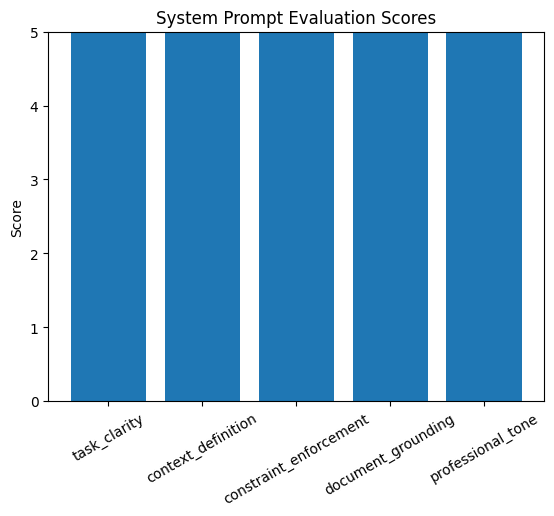

In [ ]:
plt.figure()
plt.bar(avg_system_prompt_scores.keys(), avg_system_prompt_scores.values())
plt.title("System Prompt Evaluation Scores")
plt.ylim(0,5)
plt.ylabel("Score")
plt.xticks(rotation=30)
plt.show()

## Visualize Answer Rubrics

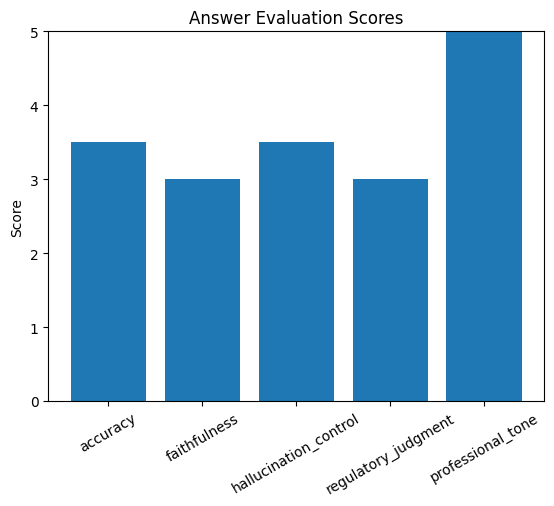

In [ ]:
plt.figure()
plt.bar(avg_answer_scores.keys(), avg_answer_scores.values())
plt.title("Answer Evaluation Scores")
plt.ylim(0,5)
plt.ylabel("Score")
plt.xticks(rotation=30)
plt.show()

## Final Score

In [ ]:
final_score = round(
    (np.mean(list(avg_system_prompt_scores.values())) +
     np.mean(list(avg_answer_scores.values()))) / 2,
    2
)

print("FINAL SCORE:", final_score)

FINAL SCORE: 4.3
